## Reading Quiz 5

Watch the Video https://www.youtube.com/watch?list=PLkIselvEzpM7Pjo94m1e7J5jkIZkbQAl4&time_continue=451&v=NVbPE1_Cbx8
Then complete the following exercises


#### NAME:  

In [1]:
## Run, But Do Not Change
# tidyverse
require(tidyverse)
# dplyr
library(dplyr)
# ggplot2
library(ggplot2)
# OI Biostats
library(oibiostat)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.0     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Problem 1

We shall use the `nhanes` data as a total population, and we shall illustrate the relationship between the normal distribution and sampling.

We shall sample the heights of individuals.

a) First, try to take the `mean` of the `Height` variable of `nhanes.samp.adult.500` and see what happens. 

In [3]:
#Answer (sort of)
data(nhanes.samp.adult.500)
mean(nhanes.samp.adult.500)

Warning message in mean.default(nhanes.samp.adult.500):
“argument is not numeric or logical: returning NA”

[1] NA

Well, that isn't good. Getting an error of this type means that there are NAs in the vector, to deal wit this, use the additional keyword argument `na.rm=TRUE`. (this tells R to remove NAs before taking the mean)

b) First get the mean and standard deviation of the `Height` variable in `nhanes.samp.adult.500`, but this time include the key-word argument, `na.rm=TRUE`.

In [2]:
#Answer
data(nhanes.samp.adult.500)
x<-nhanes.samp.adult.500$Height
mean(x,na.rm=TRUE)
sd(x,na.rm=TRUE)

[1] 168.7837

[1] 10.29321

b) Use the normal distribution to approximate the percent of of samples of size $n=50$ would have a mean $\bar x$ of less than than 166lbs.  Put the answer in the context of the question.

In [22]:
## Use the following for calculation
mu<-mean(x,na.rm=TRUE)
s<-sd(x,na.rm=TRUE)/sqrt(50)
pnorm(166,mu,s)

[1] 0.02791721

Answer:


### Problem 2

Now we are going to simulating taking 1000 samples of size 50 from `nhanes.samp.adult.500` and seeing how many are less than a given number.

(a) Complete the following for loop to make take 1000 samples of size 50 and store their means in `Samples`.

In [37]:
####
set.seed(321)
#### Answer Here
Samples<-c()

for(i in 1:1000){
    sample_vector<-sample(x,50,replace=FALSE)
    Samples[i]<-mean(sample_vector,na.rm=TRUE)
}



(b) Now compute the proportion of samples which are less than 166. Hint: you can count a proportion of a list that satisfy a certain thing by using `mean` on the boolean statement for that thing.

In [43]:
#answer
mean(Samples<166)

[1] 0.029

### Problem 3

Now, we want to visualise this. Using `ggplot` make a histogram which has extreme points (those < 166) colored a different way that the non-extreme points. This will take two steps....

a) Make a `data.frame` which has two variables: one called `samples` which has the `Samples` vector from the previous problem, and an `extreme` variable which is `TRUE` if the value is extreme and `FALSE` if it is not. (Hint: use Boolean operators of `Sample` to get the second random variable.

In [39]:
### Answer
df<- data.frame(
        samples=Samples,
        extreme=(Samples<166)
)

b) Now use `ggplot` to make a `geom_histogram` of this with `extreme` as thre coloring.

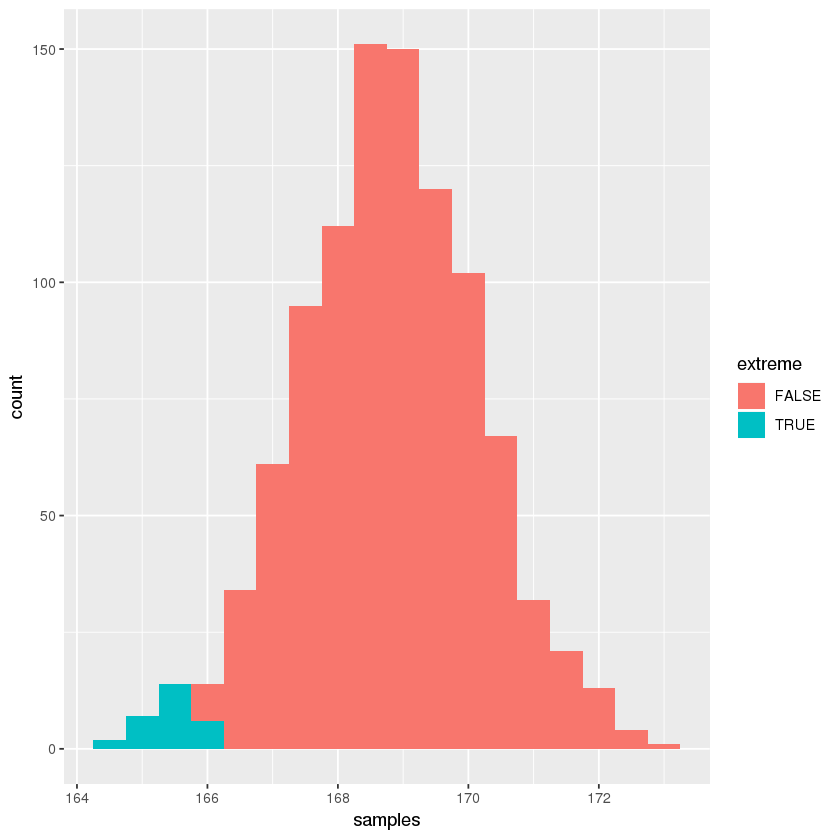

In [42]:
#Answer 
ggplot(df,aes(x=samples,fill=extreme))+geom_histogram(binwidth=.5)